In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../source_data/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.isna().sum() 

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [6]:
data = data.drop(columns= ['CustomerID'], axis = 1, errors='ignore')

In [7]:
data

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
data['Gender'] = data.Gender.map({ 'Male' : 1, 'Female' : 0})

In [9]:
data

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [11]:

data.describe()

,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [13]:
wcss = []

for i in range(1,20):
  pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('estimator', KMeans(n_clusters=i, random_state=42))                
  ])
  pred = pipeline.fit(data)

  wcss.append(pipeline.named_steps['estimator'].inertia_)

c:\Users\Tanzeem Agra\.virtualenv\kmean\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tanzeem Agra\.virtualenv\kmean\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tanzeem Agra\.virtualenv\kmean\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tanzeem Agra\.virtualenv\kmean\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_

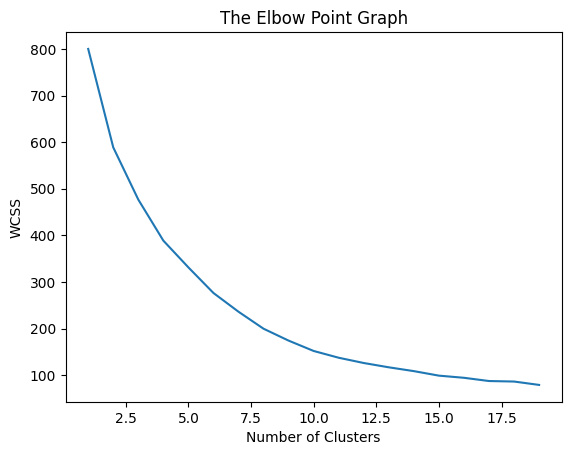

In [14]:

# draw elbow graph

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,20), wcss)
plt.title('The Elbow Point Graph')

plt.show()

In [15]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('estimator', KMeans(n_clusters=6, random_state=42))                
  ])
pipeline.fit(data)

estimator = pipeline.named_steps['estimator']

X = pipeline.named_steps['scaler'].fit_transform(data)

Y = estimator.fit_predict(X)

print(Y)

c:\Users\Tanzeem Agra\.virtualenv\kmean\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tanzeem Agra\.virtualenv\kmean\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 2 2 2 2 0 2 3 2 3 2 0 2 3 1 2 1 3 2 3 1 0 1 0 1 0 1 0 2 3 2 3 1 0 2 0
 2 0 2 0 1 3 2 0 2 0 2 2 2 0 1 2 3 0 3 0 3 2 3 3 1 0 0 3 1 0 0 1 2 3 0 0 0
 3 1 0 3 2 0 3 1 3 0 2 3 0 2 2 0 0 1 3 0 2 1 0 2 3 1 2 0 3 1 3 2 0 3 3 3 3
 2 0 1 2 2 0 0 0 0 1 0 0 1 5 4 3 1 3 1 3 1 5 4 5 4 5 1 5 4 0 1 5 4 5 1 3 4
 5 1 5 1 5 4 5 4 5 4 5 4 0 4 5 4 3 4 5 4 5 1 5 1 5 1 5 4 3 1 3 1 5 4 5 4 5
 1 5 1 5 4 5 4 5 4 5 4 5 4 5 4]


In [16]:
print('The no of cluster is :', np.unique(Y)) 

The no of cluster is : [0 1 2 3 4 5]


In [17]:
labels = pd.DataFrame(estimator.labels_)
data_with_labels = pd.concat((data,labels),axis=1)
data_with_labels = data_with_labels.rename({0:'labels'},axis=1)

data_with_labels.to_csv("temp.csv", index=False)

In [18]:
data.to_csv('../data/raw/mall_segmentation.csv', mode='w', index=False )

OSError: Cannot save file into a non-existent directory: '..\MLOps_KMean\data\raw'